In [1]:
# Importing Packages and performing some Data Preprocessing

import folium 
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
import re

#Source: https://www.bostonplans.org/housing/finding-housing/property-listings
data = pd.read_csv("existing_aff.csv")
data['Building Address'] = data['Building Address'].str.replace('\n', ' ')
data['For Current Vacancies and More Information'] = data['For Current Vacancies and More Information'].str.replace('\n', ' ')
data = data.rename(columns={'Neighborhood\t':'Neighborhood'})
data = data.rename(columns={'Bedroom Sizes\t':'Bedroom Sizes'})
# Bedroom Size
data['1BR'] = np.where(data['Bedroom Sizes'].str.contains('1BR'), 1, 0)
data['2BR'] = np.where(data['Bedroom Sizes'].str.contains('2BR'), 1, 0)
data['3BR'] = np.where(data['Bedroom Sizes'].str.contains('3BR'), 1, 0)
data['4BR'] = np.where(data['Bedroom Sizes'].str.contains('4BR'), 1, 0)
data['Studio'] = np.where(data['Bedroom Sizes'].str.contains('Studio'), 1, 0)

# AMI
data['AMI'] = data['AMI Categories']
data['AMI'] = data['AMI'].str.replace('%', ' ')
data['AMI'] = data['AMI'].str.replace('-', ' ')
data['AMI'] = data['AMI'].str.replace(',', ' ')
data = data.dropna()
max_ = []
min_ = []
for index,row in data.iterrows():
    if row['AMI'] != 'NaN':
        l = row['AMI'].rstrip().split(' ')
        max_.append(int(l[-1]))
        min_.append(int(l[0]))
data['AMI_max'] = max_
data['AMI_min'] = min_
data


,Neighborhood,Building Address,For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories,1BR,2BR,3BR,4BR,Studio,AMI,AMI_max,AMI_min
0,Allston,8 Griggs Street,The Mount Vernon Company: 617.267.0006,2.0,1BR,80-100%; 100%,1,0,0,0,0,80 100 ; 100,100,80
1,Allston,"Continuum, 219 Western Avenue",617.603.5660 info@continuumallston.com,42.0,"Studio, 1BR, 2BR, 3BR",70%,1,1,1,0,1,70,70,70
2,Allston,"The Edge, 60–66 Brainerd Road",National Development: 857.576.6160,10.0,"Studio, 1BR, 2BR",70%,1,1,0,0,1,70,70,70
3,Allston,"The Element , 65 Brainerd Road",National Development: 857.576.6160,4.0,"Studio, 1BR",70%,1,0,0,0,1,70,70,70
4,Allston,"The Eco Allston, 75 Brainerd Road",National Development: 857.576.6160,14.0,"Studio, 1BR, 2BR",70%,1,1,0,0,1,70,70,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,South End,"Troy Boston, 275 Albany Street",Equity Residential:617-517-7302,38.0,"Studio, 1BR, 2BR",70%,1,1,0,0,1,70,70,70
84,West End,Avalon North Station,Avalon Communities: 617.236.1369,30.0,"Studio, 1BR, 2BR, 3BR","80%, 80-120%",1,1,1,0,1,80 80 120,120,80
85,West End,"Emerson Place, 72 Staniford Street, (1 & 10 Em...",Equity Residential: 617.973.2200,19.0,"Studio, 1BR, 2BR",90%,1,1,0,0,1,90,90,90
86,West Roxbury,"Belgrade Place, 446 Belgrade Avenue",Maloney Properties: 617.209.5406 Belgrade@malo...,5.0,"Studio, 1BR, 2BR, 3BR",70%,1,1,1,0,1,70,70,70


In [2]:
# Plotting the Heat Map on Boston City's Map using Folium

loca = pd.read_csv("neighbourhood_loc.csv")
h = pd.merge(data, loca, on = ['Neighborhood'])

hdata = h[['Lat','Lon','Number of Units Tracked']].values.tolist()
bosmap = folium.Map(location=[42.359306891720756, -71.05944597037367])
HeatMap(hdata).add_to(bosmap)

filePath = r"index.html"
bosmap.save("index.html")

[33.0, 9.0, 694.0, 22.0, 91.0, 57.0, 58.0, 446.0, 26.0]


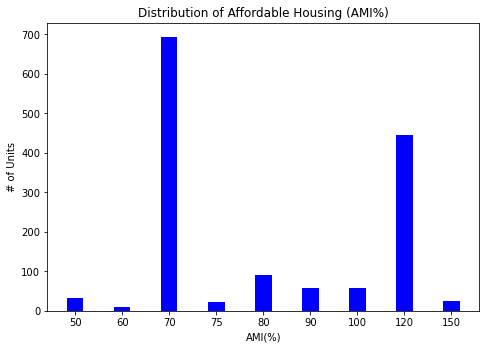

In [3]:
# Plotting the No. of Units per AMI Percentage

import matplotlib.pyplot as plt

all_AMI = data['AMI_max'].unique()
all_AMI.sort()

group_ami = data.groupby('AMI_max')
total_unit = group_ami['Number of Units Tracked'].sum()
num_unit = []
for i in all_AMI:
    num_unit.append(total_unit[i])
print(num_unit)
    
N = len(all_AMI)
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, num_unit, width, color = 'b')
ax.set_ylabel('# of Units')
ax.set_xlabel('AMI(%)')
ax.set_title('Distribution of Affordable Housing (AMI%)')
ax.set_xticks(ind, all_AMI)
ax.set_yticks(np.arange(0, 701, 100))

plt.show()


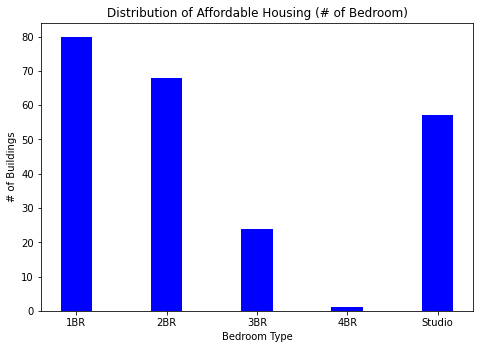

In [4]:
# Plotting the No. of Affordable Housing Units based on No. of Bedrooms

all_bedroom = ['1BR', '2BR', '3BR', '4BR', 'Studio']
num_u = [0]*5
num_u[0] = data['1BR'].sum()
num_u[1] = data['2BR'].sum()
num_u[2] = data['3BR'].sum()
num_u[3] = data['4BR'].sum()
num_u[4] = data['Studio'].sum()

N = len(all_bedroom)
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, num_u, width, color = 'b')
ax.set_ylabel('# of Buildings')
ax.set_xlabel('Bedroom Type')
ax.set_title('Distribution of Affordable Housing (# of Bedroom)')
ax.set_xticks(ind, all_bedroom)
ax.set_yticks(np.arange(0, 81, 10))

plt.show()